In [29]:
#importação de bibliotecas do py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns            


#importação do dataset
df = pd.read_csv("D:/Downloads-UD/dataset-ap-geral.csv", sep=";", encoding="utf-8")

In [30]:
#Ciação do variável preco/m2

if "area(m2)" in df.columns:
    #substitui vírgulas por pontos e converte para numérico (caso necessário)
    df["area"] = df["area(m2)"].astype(str).str.replace(",", ".")
    df["area"] = pd.to_numeric(df["area"], errors="coerce")

    #remove registros com área inválida ou zero para evitar divisões por zero
    df = df[df["area(m2)"].notnull() & (df["area(m2)"] > 0)]

    #calcula o preço por metro quadrado
    df["preco_m2"] = df["valor"] / df["area"]

    #exibe as 5 primeiras linhas
    print(df[["valor", "area(m2)", "preco_m2"]].head(10))
else:
    print("A coluna 'area' não foi encontrada no dataframe.")

     valor  area(m2)      preco_m2
0   753000        84   8964.285714
1  2590000       167  15508.982036
2   579000        54  10722.222222
3   350000        80   4375.000000
4   869000       122   7122.950820
5   950000       182   5219.780220
6   350000        64   5468.750000
7   285000        45   6333.333333
8   550000        70   7857.142857
9  2800000       287   9756.097561


In [31]:
#iqr
Q1 = np.percentile(df["preco_m2"], 25)
Q3 = np.percentile(df["preco_m2"], 75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

#retirada de outliers
outliers = df[(df["preco_m2"] < limite_inferior) | (df["preco_m2"] > limite_superior)]

#stats
print("Estatísticas dos OUTLIERS em preco_m2:\n")
print(outliers["preco_m2"].describe())

#%outliers
percentual = (outliers.shape[0] / df.shape[0]) * 100
print(f"\nOutliers representam {percentual:.2f}% dos imóveis.\n")

#extremos
print("TOP 10 maiores valores de preco_m2 (outliers):")
print(outliers.sort_values("preco_m2", ascending=False)[["valor", "area(m2)", "preco_m2"]].head(10))

Estatísticas dos OUTLIERS em preco_m2:

count      369.000000
mean     19314.178554
std       6320.712662
min      14848.484848
25%      15822.784810
50%      17200.000000
75%      20233.463035
max      79750.000000
Name: preco_m2, dtype: float64

Outliers representam 4.39% dos imóveis.

TOP 10 maiores valores de preco_m2 (outliers):
         valor  area(m2)      preco_m2
576    1595000        20  79750.000000
7056  31677000       570  55573.684211
1586  14000000       270  51851.851852
8136   1967863        48  40997.145833
1921   1967863        48  40997.145833
2594  16450000       415  39638.554217
4272  13000000       343  37900.874636
1898   8400000       228  36842.105263
6793   8000001       220  36363.640909
496     360000        10  36000.000000


In [32]:
#bairros/cidades com mais outliers

if "bairro/cidade" in df.columns:
    print("\nTop bairros/cidades com + outliers de preço_m2:")
    print(outliers["bairro/cidade"].value_counts().head(10))


Top bairros/cidades com + outliers de preço_m2:
bairro/cidade
São Paulo         65
Pinheiros         23
Moema             21
Brooklin          18
Perdizes          18
Vila Mariana      16
Rio de Janeiro    15
Campo Belo        13
Vila Olímpia      11
Paraíso           11
Name: count, dtype: int64


In [33]:
# Não-outliers
nao_outliers = df[(df["preco_m2"] >= limite_inferior) & (df["preco_m2"] <= limite_superior)]

# Selecionar colunas de interesse (ajuste conforme suas colunas reais)
colunas_interesse = ["valor", "area(m2)", "quartos", "garagem", "banheiro", "suite", "condominio"]

# Verificar colunas que existem no DataFrame
colunas_presentes = [col for col in colunas_interesse if col in df.columns]

# MÉDIAS
print("=== MÉDIAS DOS OUTLIERS ===")
print(outliers[colunas_presentes].mean())

print("\n=== MÉDIAS DOS NÃO-OUTLIERS ===")
print(nao_outliers[colunas_presentes].mean())

# DIFERENÇA RELATIVA
print("\n=== DIFERENÇA RELATIVA (%) ===")
diferenca = ((outliers[colunas_presentes].mean() - nao_outliers[colunas_presentes].mean()) / nao_outliers[colunas_presentes].mean()) * 100
print(diferenca.round(2))

=== MÉDIAS DOS OUTLIERS ===
valor         2.570433e+06
area(m2)      1.249268e+02
quartos       2.441734e+00
garagem       1.945799e+00
banheiro      2.739837e+00
suite         3.604336e-01
condominio    1.293263e+03
dtype: float64

=== MÉDIAS DOS NÃO-OUTLIERS ===
valor         546337.225501
area(m2)          79.163741
quartos            2.273565
garagem            1.306811
banheiro           1.817831
suite              0.341551
condominio       718.345412
dtype: float64

=== DIFERENÇA RELATIVA (%) ===
valor         370.48
area(m2)       57.81
quartos         7.40
garagem        48.90
banheiro       50.72
suite           5.53
condominio     80.03
dtype: float64


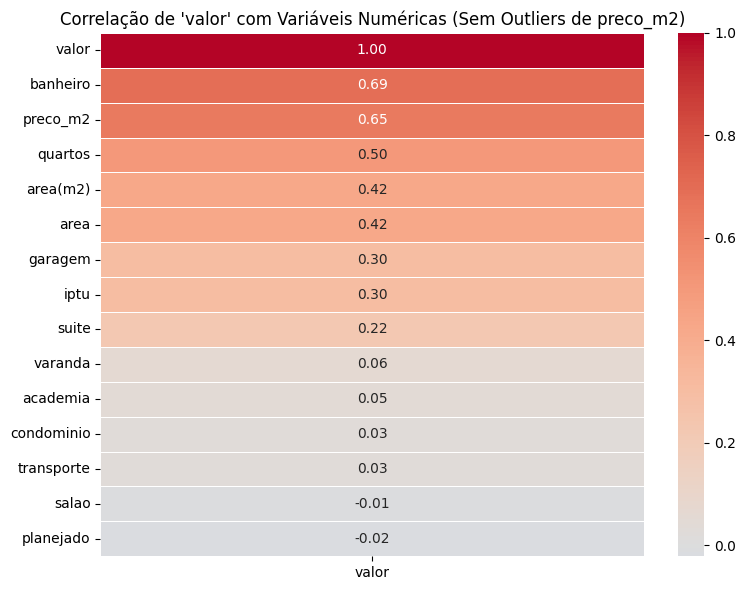

In [36]:
# Usa o DataFrame sem os outliers de preco_m2
df_sem_outliers = df[(df["preco_m2"] >= limite_inferior) & (df["preco_m2"] <= limite_superior)]

# Seleciona apenas colunas numéricas
df_numerico = df_sem_outliers.select_dtypes(include=['number'])

# Calcula a matriz de correlação
correlacoes = df_numerico.corr()

# Gera o heatmap com foco na variável 'valor'
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes[["valor"]].sort_values(by="valor", ascending=False),
            annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("Correlação de 'valor' com Variáveis Numéricas (Sem Outliers de preco_m2)")
plt.tight_layout()
plt.show()


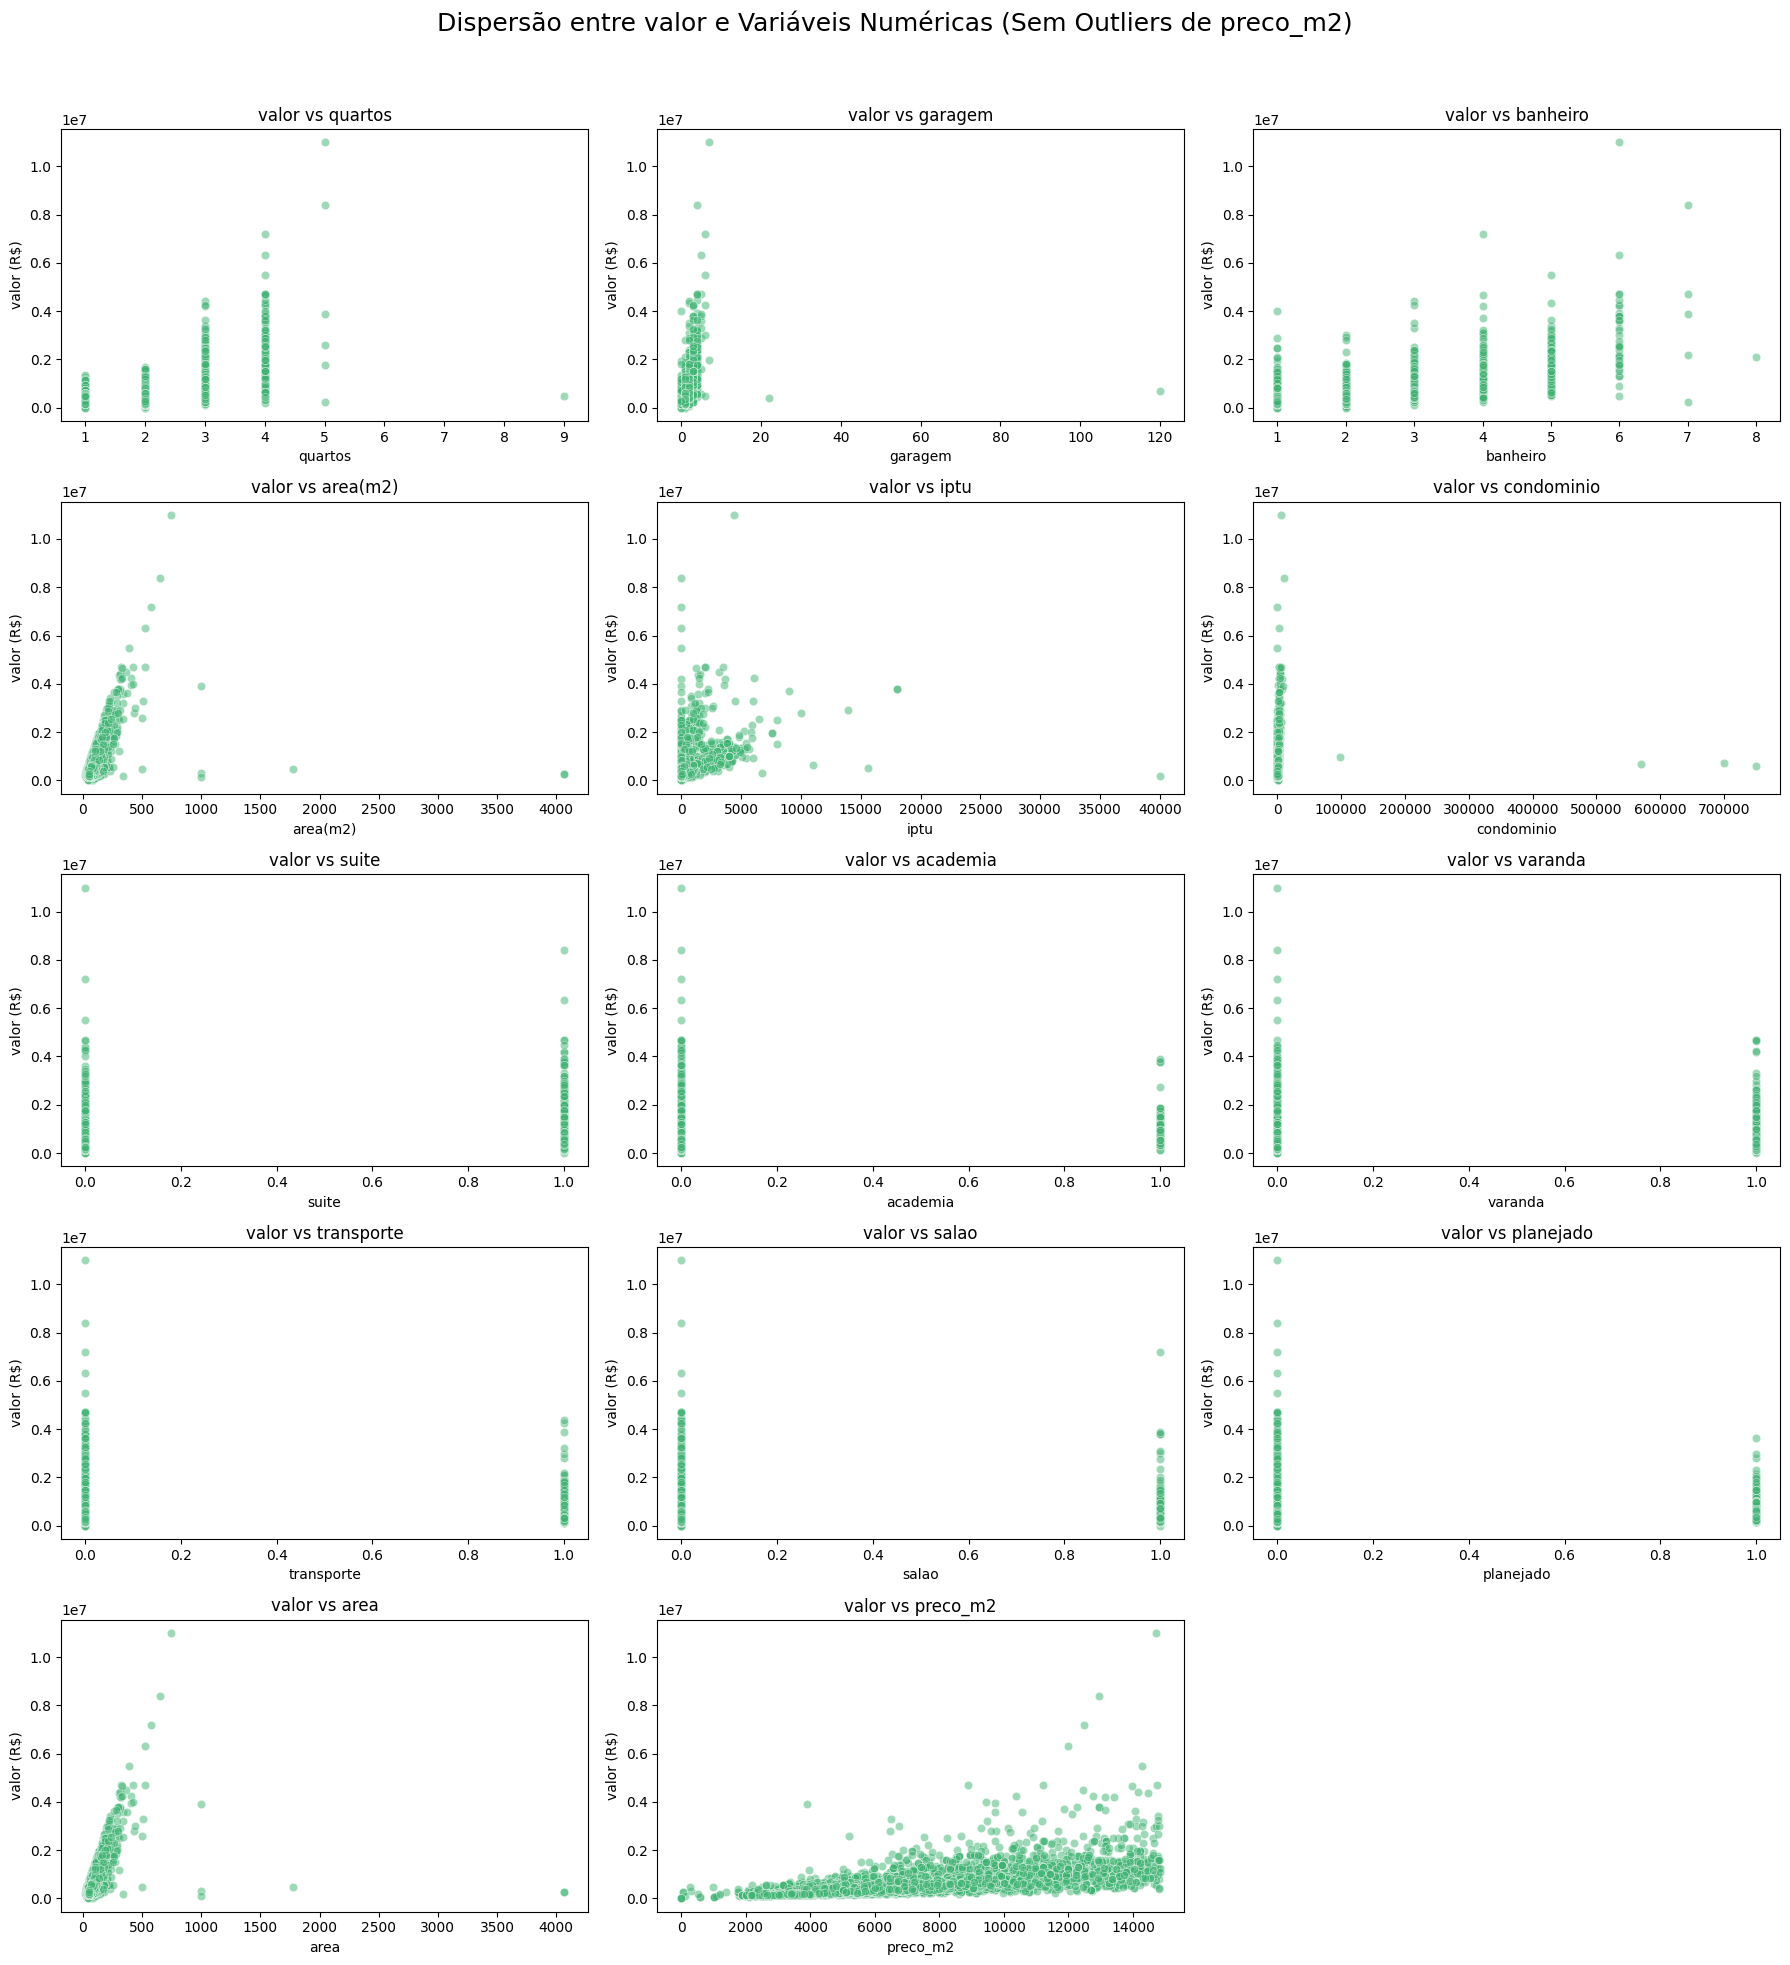

In [38]:
import math

# Usa o DataFrame sem os outliers de preco_m2
df_sem_outliers = df[(df["preco_m2"] >= limite_inferior) & (df["preco_m2"] <= limite_superior)]

# Seleciona colunas numéricas e calcula a correlação com 'valor'
df_numerico = df_sem_outliers.select_dtypes(include=['number'])
variaveis_corr = df_numerico.columns.drop("valor")

# Configura o número de gráficos por linha
n = len(variaveis_corr)
cols = 3
rows = math.ceil(n / cols)

# Cria os gráficos de dispersão
plt.figure(figsize=(6 * cols, 4 * rows))
for i, var in enumerate(variaveis_corr):
    plt.subplot(rows, cols, i+1)
    sns.scatterplot(x=var, y="valor", data=df_sem_outliers, alpha=0.5, color='mediumseagreen')
    plt.title(f"valor vs {var}")
    plt.xlabel(var)
    plt.ylabel("valor (R$)")

plt.suptitle("Dispersão entre valor e Variáveis Numéricas (Sem Outliers de preco_m2)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

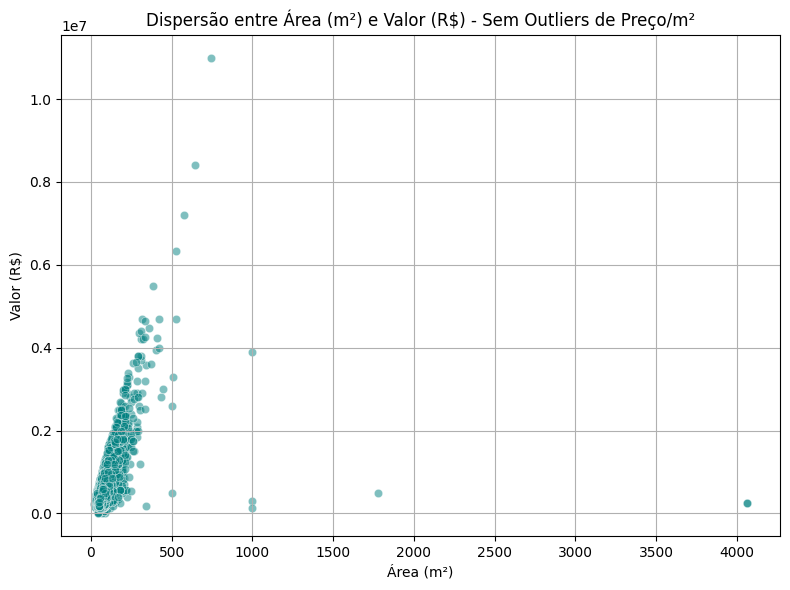

In [39]:
# Garante o uso do DataFrame sem outliers de preco_m2
df_sem_outliers = df[(df["preco_m2"] >= limite_inferior) & (df["preco_m2"] <= limite_superior)]

# Cria o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x="area(m2)", y="valor", data=df_sem_outliers, alpha=0.5, color='teal')
plt.title("Dispersão entre Área (m²) e Valor (R$) - Sem Outliers de Preço/m²")
plt.xlabel("Área (m²)")
plt.ylabel("Valor (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()

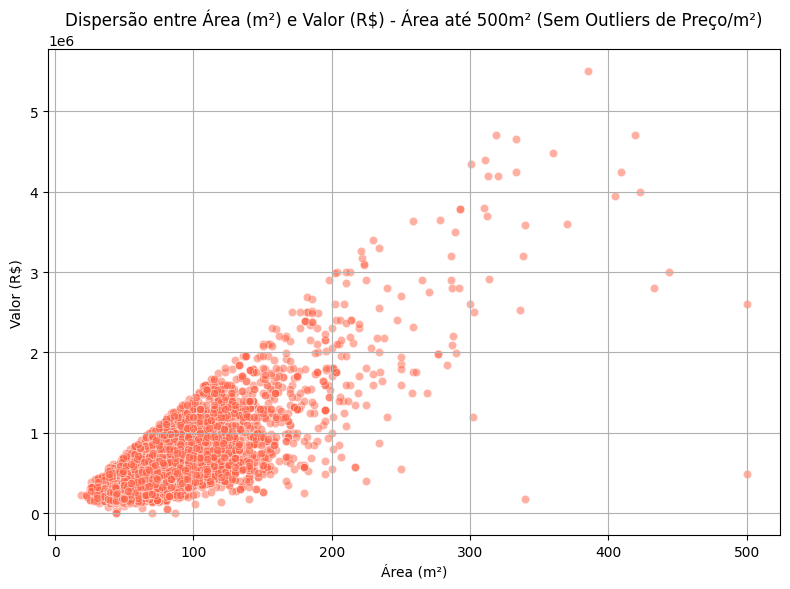

In [43]:
# Filtra os dados: sem outliers de preco_m2 e com área até 500m²
df_filtrado = df_sem_outliers[df_sem_outliers["area(m2)"] <= 500]

# Cria o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x="area(m2)", y="valor", data=df_filtrado, alpha=0.5, color='tomato')
plt.title("Dispersão entre Área (m²) e Valor (R$) - Área até 500m² (Sem Outliers de Preço/m²)")
plt.xlabel("Área (m²)")
plt.ylabel("Valor (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()

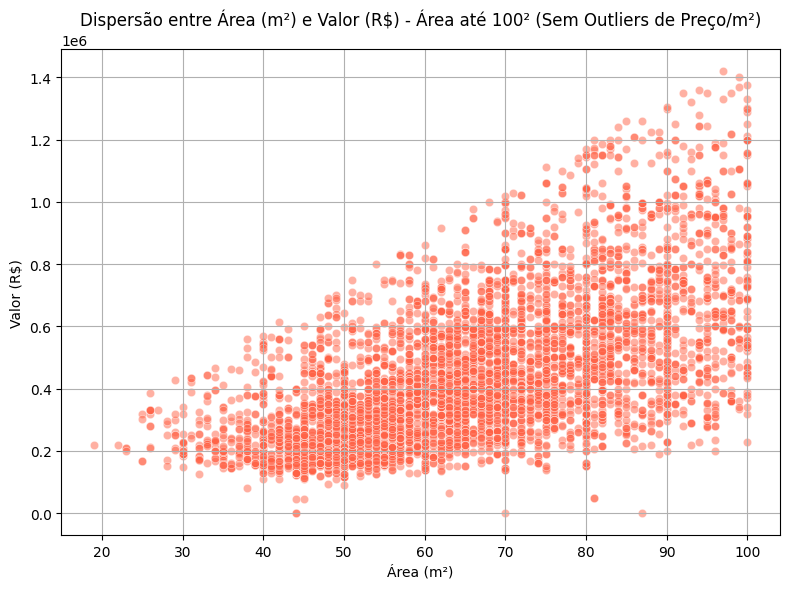

In [44]:
# Filtra os dados: sem outliers de preco_m2 e com área até 500m²
df_filtrado = df_sem_outliers[df_sem_outliers["area(m2)"] <= 100]

# Cria o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x="area(m2)", y="valor", data=df_filtrado, alpha=0.5, color='tomato')
plt.title("Dispersão entre Área (m²) e Valor (R$) - Área até 100² (Sem Outliers de Preço/m²)")
plt.xlabel("Área (m²)")
plt.ylabel("Valor (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()

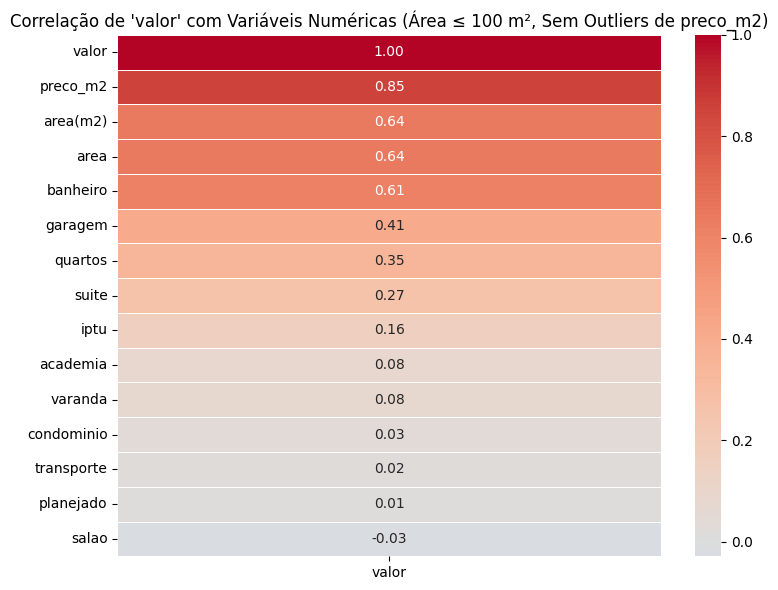

In [45]:
# Filtra os dados: sem outliers de preco_m2 e com área até 100 m²
df_filtrado = df_sem_outliers[df_sem_outliers["area(m2)"] <= 100]

# Seleciona apenas colunas numéricas
df_numerico = df_filtrado.select_dtypes(include=['number'])

# Calcula a matriz de correlação
correlacoes = df_numerico.corr()

# Gera o heatmap com foco na variável 'valor'
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes[["valor"]].sort_values(by="valor", ascending=False),
            annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("Correlação de 'valor' com Variáveis Numéricas (Área ≤ 100 m², Sem Outliers de preco_m2)")
plt.tight_layout()
plt.show()


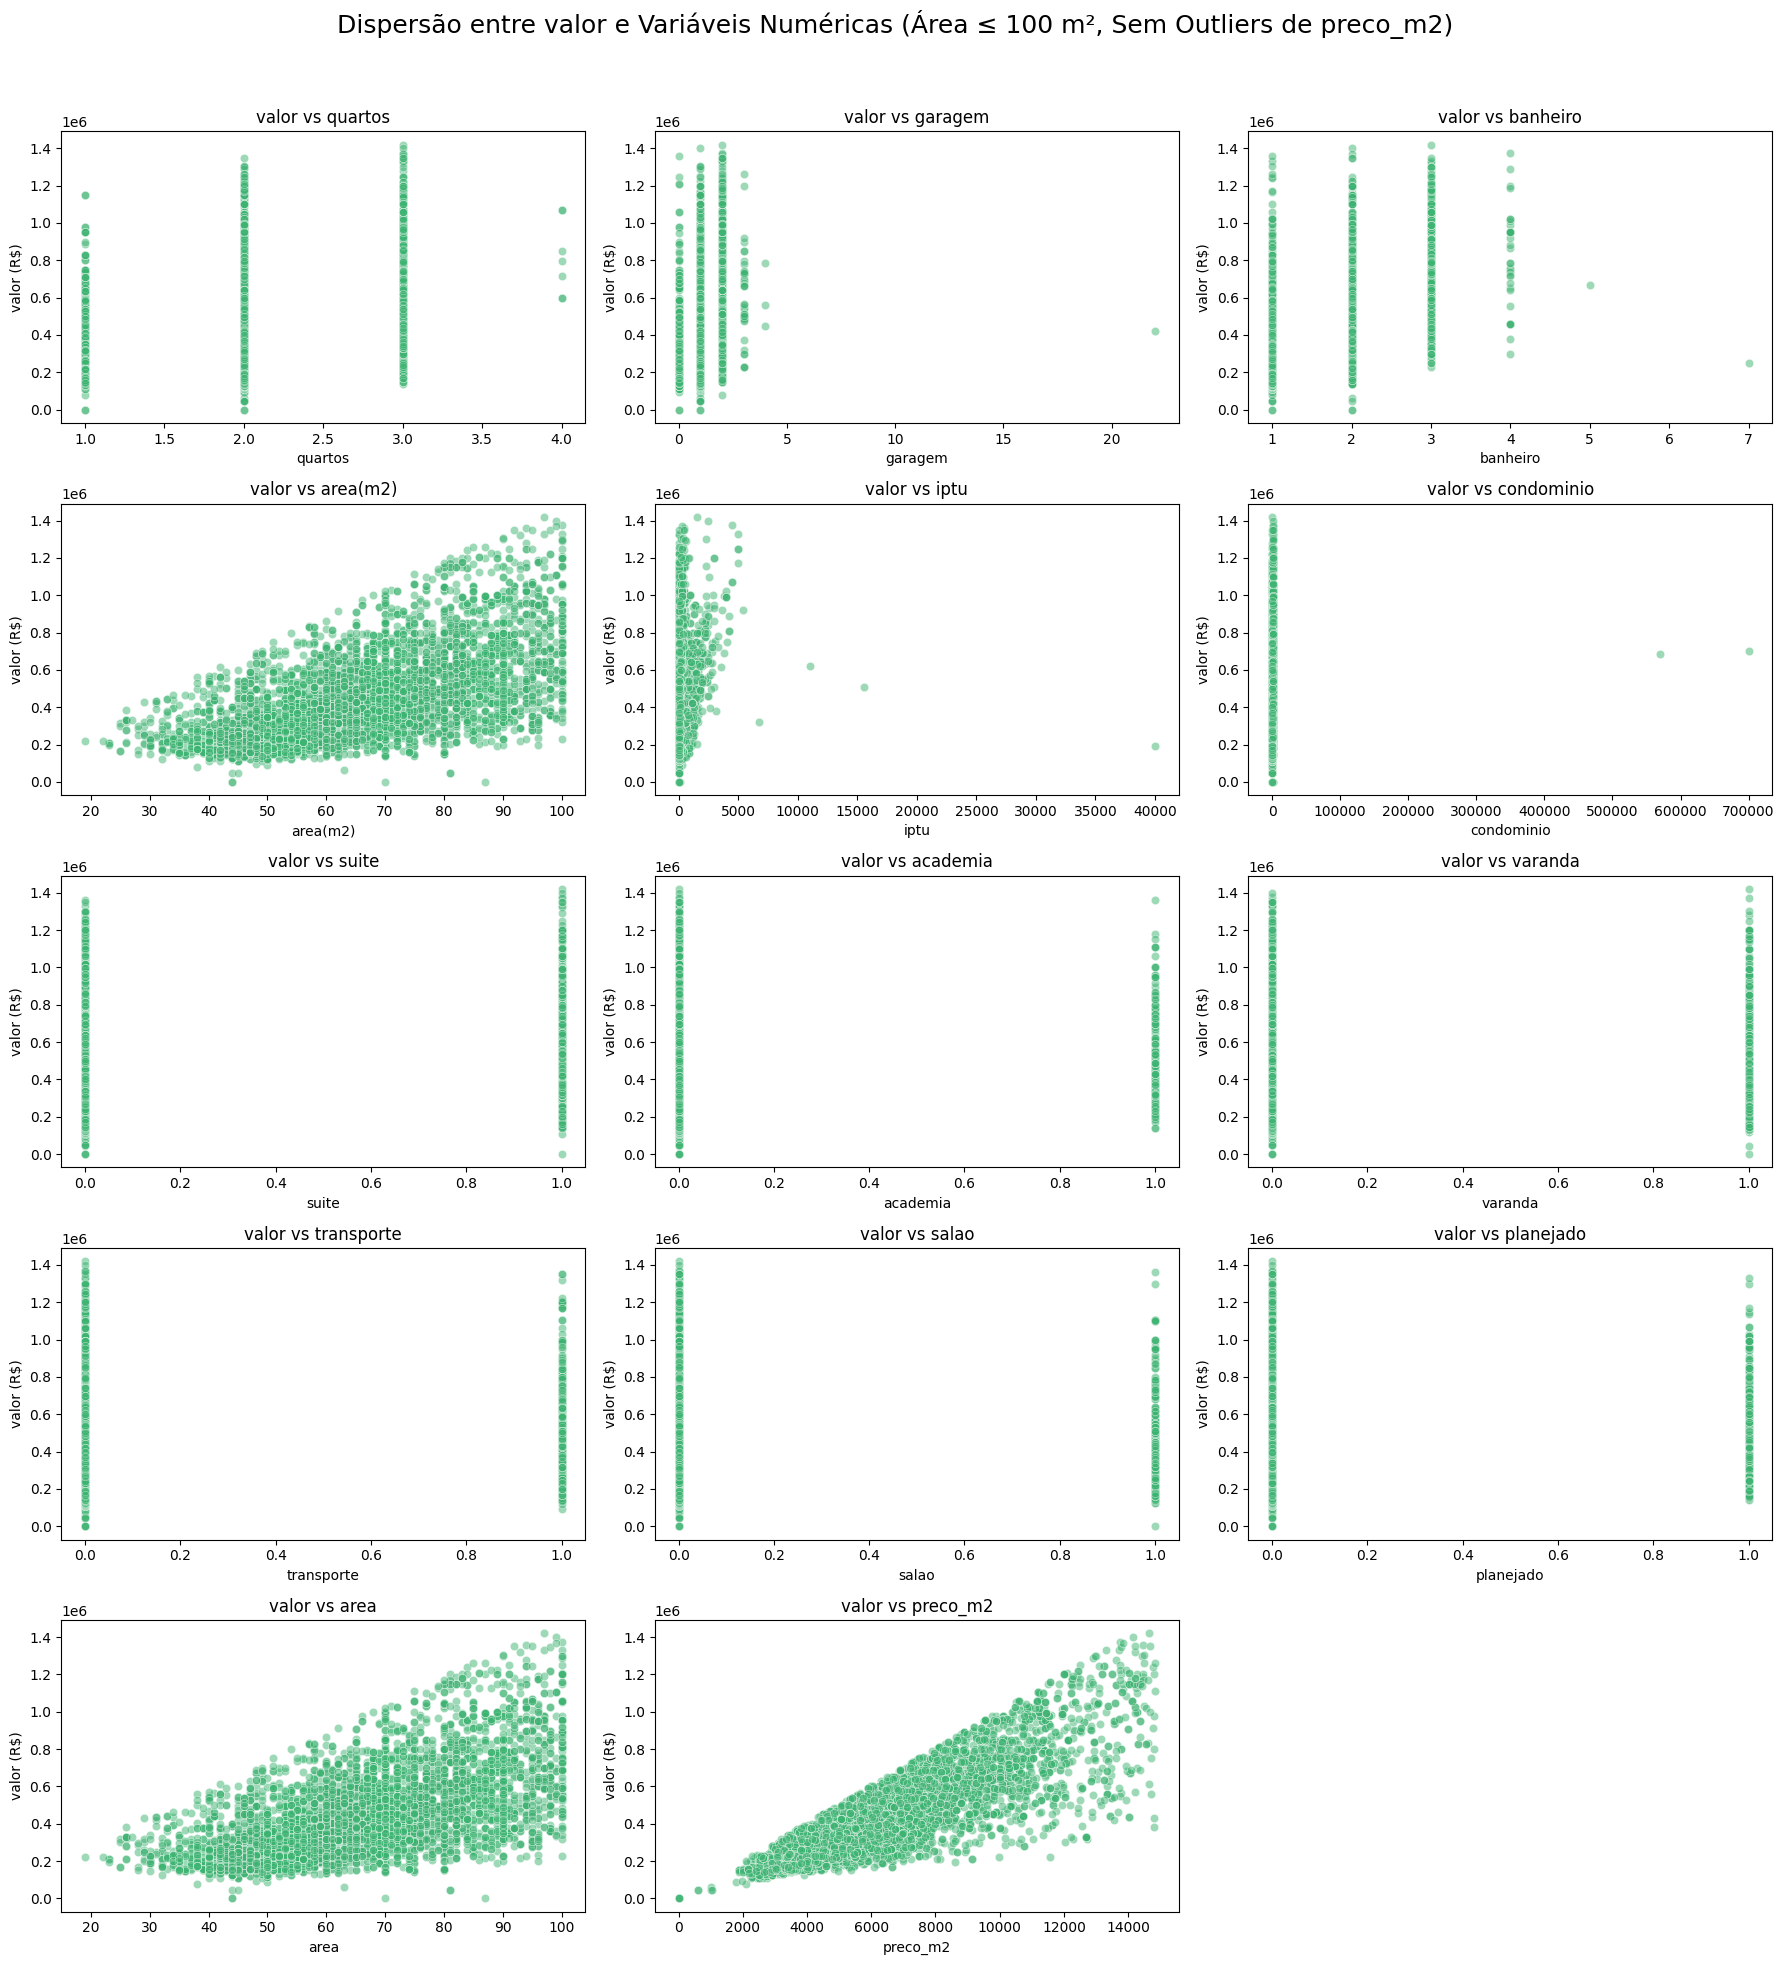

In [46]:
# Filtra os dados: sem outliers de preco_m2 e com área até 100 m²
df_filtrado = df_sem_outliers[df_sem_outliers["area(m2)"] <= 100]

# Seleciona colunas numéricas e calcula a correlação com 'valor'
df_numerico = df_filtrado.select_dtypes(include=['number'])
variaveis_corr = df_numerico.columns.drop("valor")

# Configura o número de gráficos por linha
n = len(variaveis_corr)
cols = 3
rows = math.ceil(n / cols)

# Cria os gráficos de dispersão
plt.figure(figsize=(6 * cols, 4 * rows))
for i, var in enumerate(variaveis_corr):
    plt.subplot(rows, cols, i+1)
    sns.scatterplot(x=var, y="valor", data=df_filtrado, alpha=0.5, color='mediumseagreen')
    plt.title(f"valor vs {var}")
    plt.xlabel(var)
    plt.ylabel("valor (R$)")

plt.suptitle("Dispersão entre valor e Variáveis Numéricas (Área ≤ 100 m², Sem Outliers de preco_m2)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

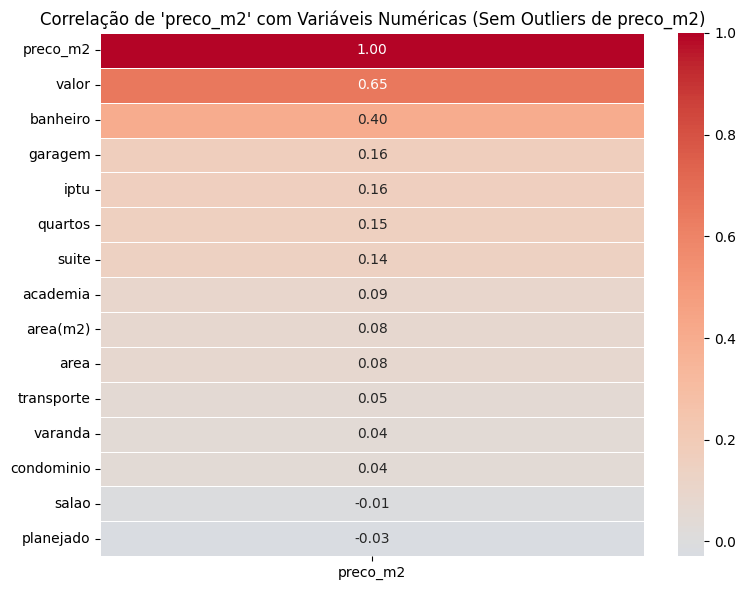

In [47]:
# Usa o DataFrame sem os outliers de preco_m2
df_sem_outliers = df[(df["preco_m2"] >= limite_inferior) & (df["preco_m2"] <= limite_superior)]

# Seleciona apenas colunas numéricas
df_numerico = df_sem_outliers.select_dtypes(include=['number'])

# Calcula a matriz de correlação
correlacoes = df_numerico.corr()

# Gera o heatmap com foco na variável 'preco_m2'
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes[["preco_m2"]].sort_values(by="preco_m2", ascending=False),
            annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("Correlação de 'preco_m2' com Variáveis Numéricas (Sem Outliers de preco_m2)")
plt.tight_layout()
plt.show()

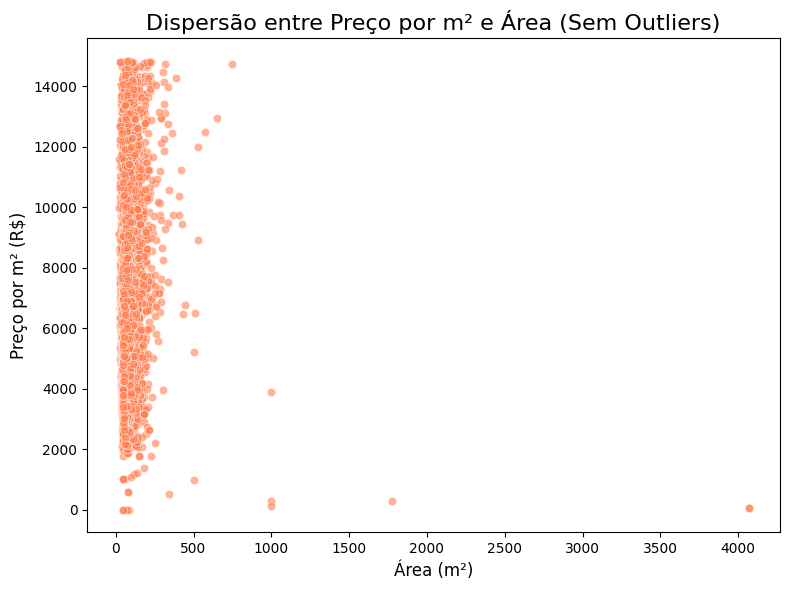

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usa o DataFrame sem os outliers de preco_m2
df_sem_outliers = df[(df["preco_m2"] >= limite_inferior) & (df["preco_m2"] <= limite_superior)]

# Cria o gráfico de dispersão entre preco_m2 e area(m2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="area(m2)", y="preco_m2", data=df_sem_outliers, alpha=0.6, color='coral')

# Adiciona título e rótulos aos eixos
plt.title("Dispersão entre Preço por m² e Área (Sem Outliers)", fontsize=16)
plt.xlabel("Área (m²)", fontsize=12)
plt.ylabel("Preço por m² (R$)", fontsize=12)

# Exibe o gráfico
plt.tight_layout()
plt.show()


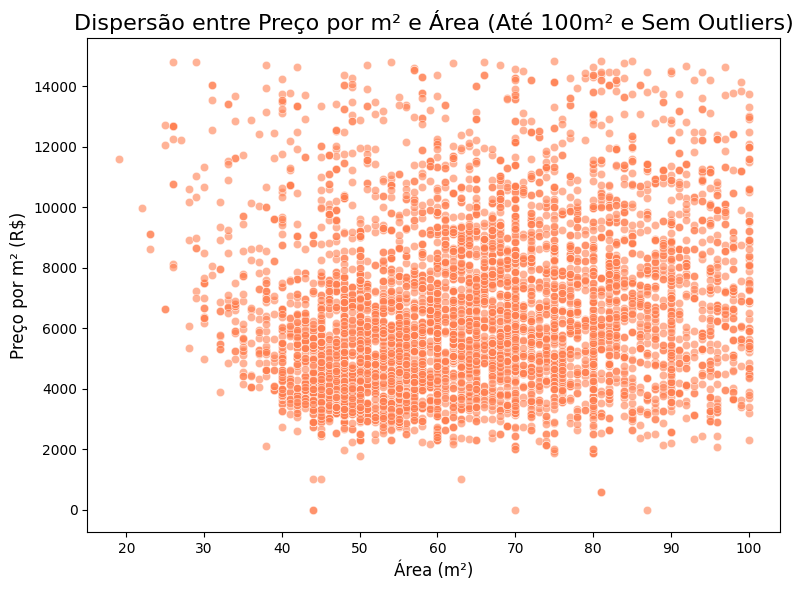

In [49]:
# Usa o DataFrame sem os outliers de preco_m2
df_sem_outliers = df[(df["preco_m2"] >= limite_inferior) & (df["preco_m2"] <= limite_superior)]

# Filtra os imóveis com área até 100 m²
df_ate_100m2 = df_sem_outliers[df_sem_outliers["area(m2)"] <= 100]

# Cria o gráfico de dispersão entre preco_m2 e area(m2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="area(m2)", y="preco_m2", data=df_ate_100m2, alpha=0.6, color='coral')

# Adiciona título e rótulos aos eixos
plt.title("Dispersão entre Preço por m² e Área (Até 100m² e Sem Outliers)", fontsize=16)
plt.xlabel("Área (m²)", fontsize=12)
plt.ylabel("Preço por m² (R$)", fontsize=12)

# Exibe o gráfico
plt.tight_layout()
plt.show()


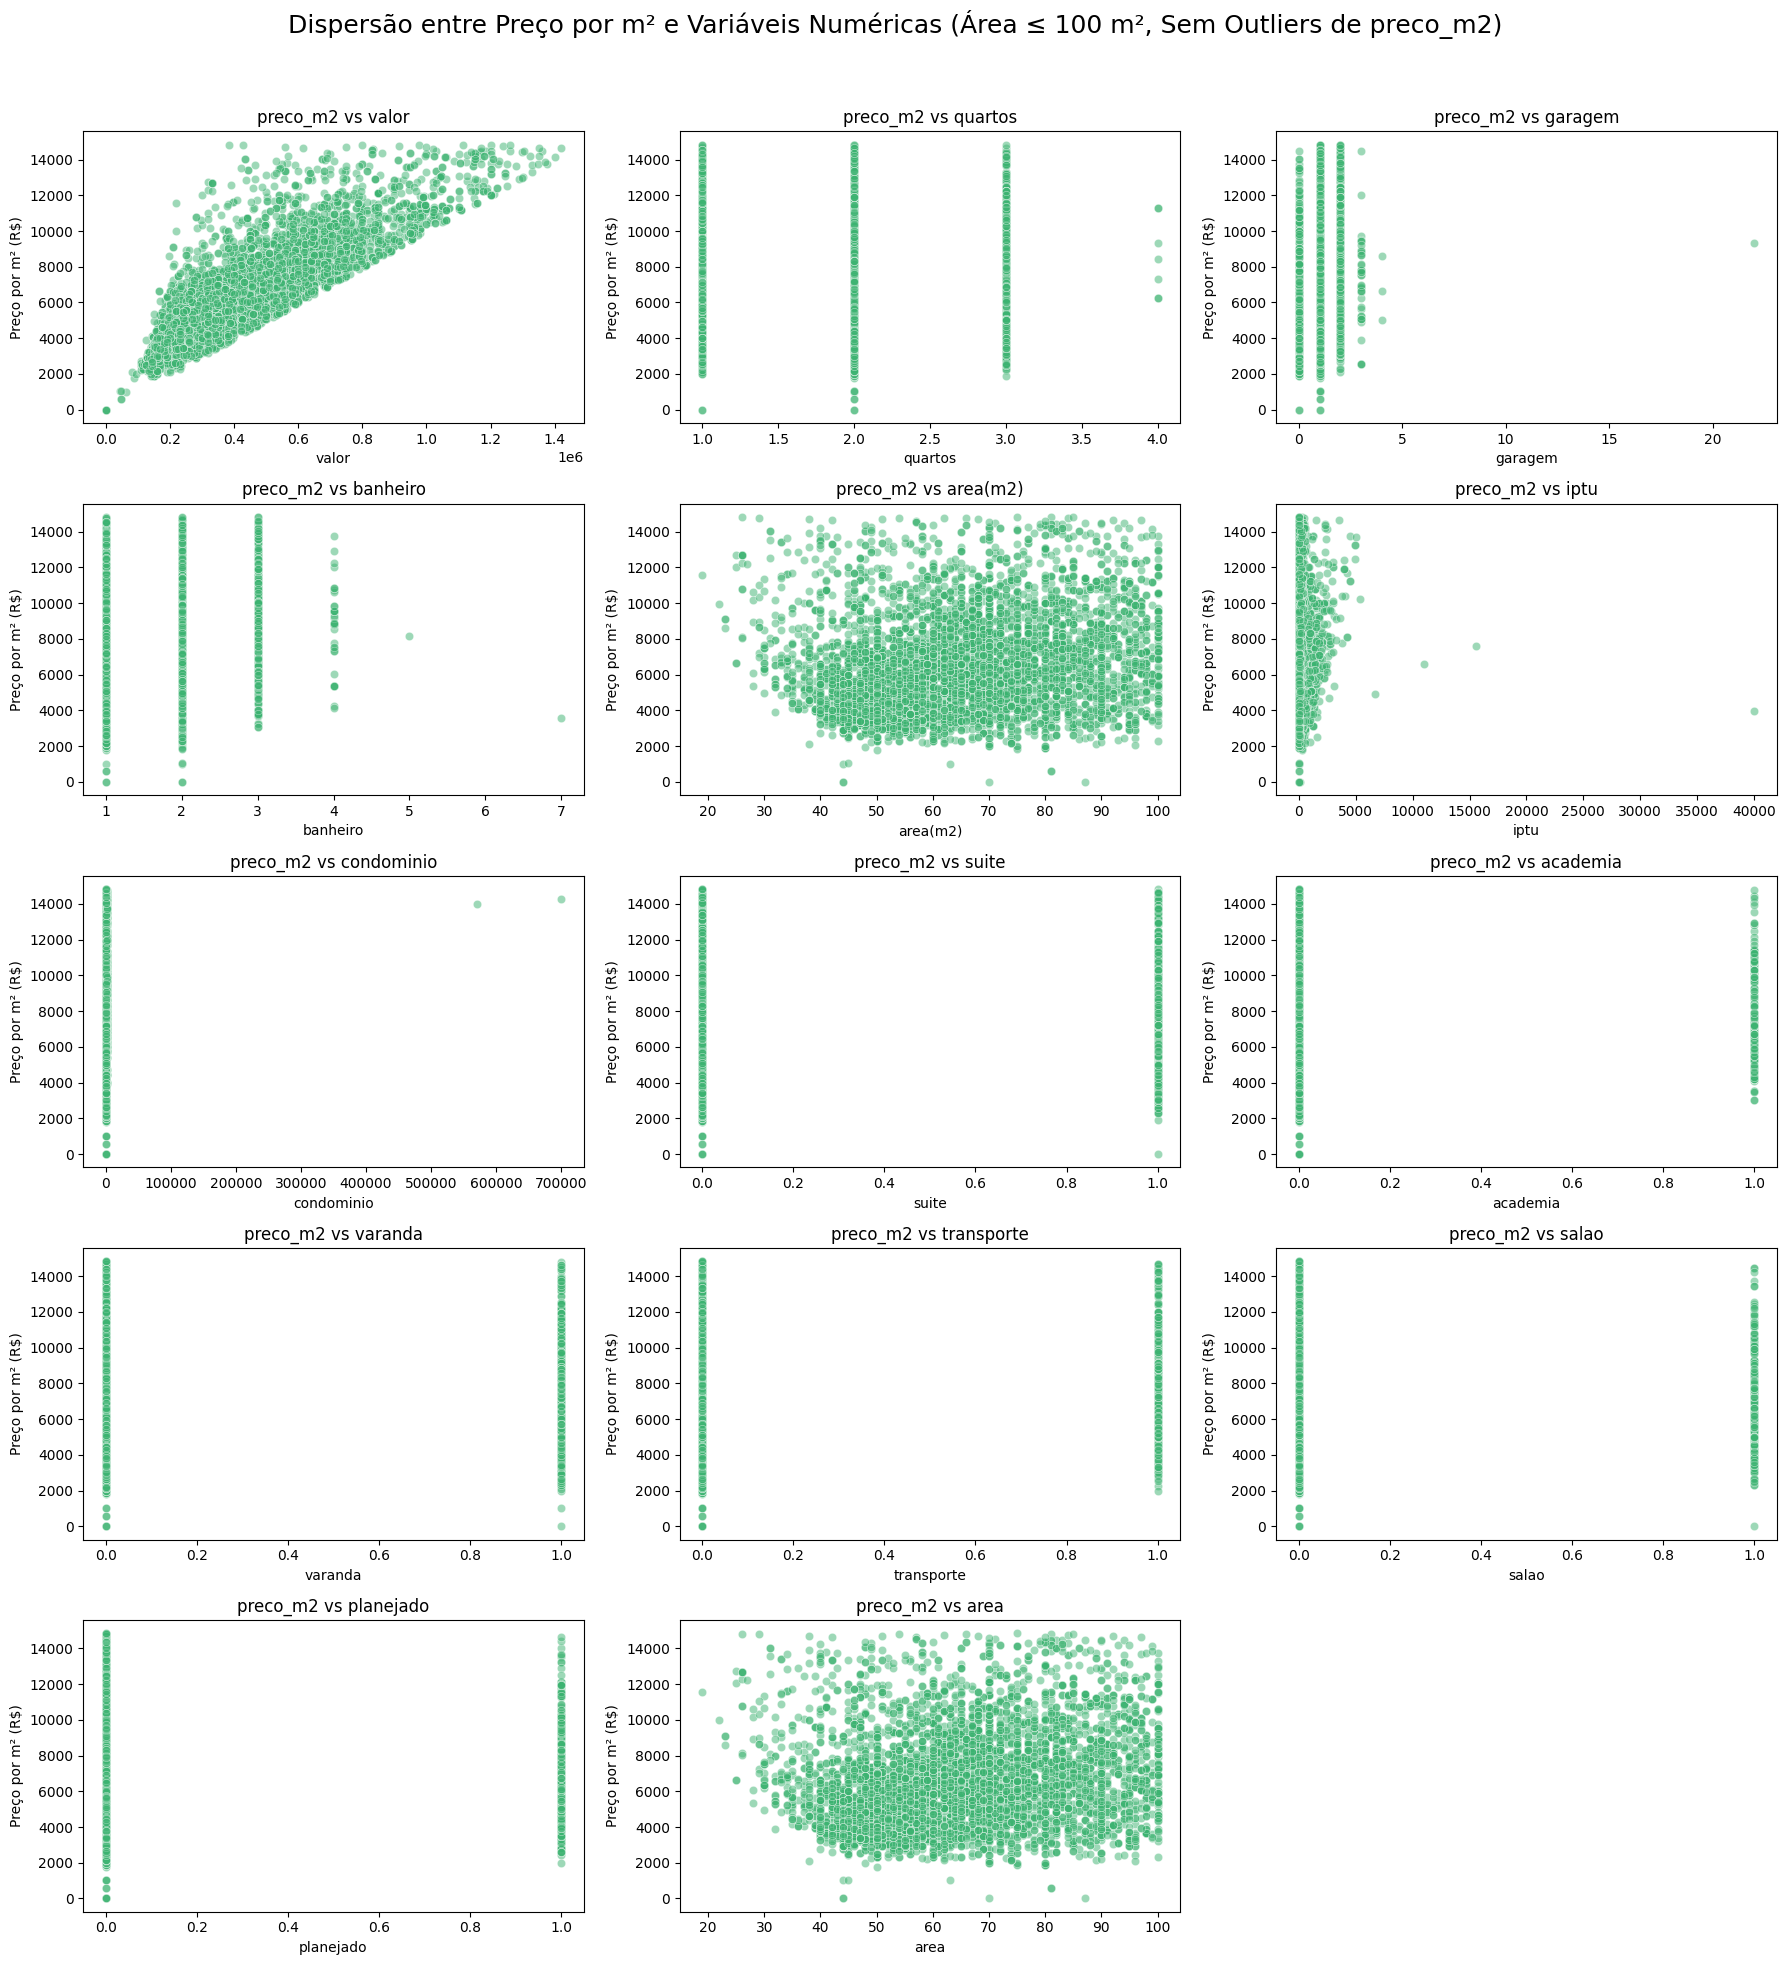

In [50]:
# Filtra os dados: sem outliers de preco_m2 e com área até 100 m²
df_filtrado = df_sem_outliers[df_sem_outliers["area(m2)"] <= 100]

# Seleciona colunas numéricas e calcula a correlação com 'preco_m2'
df_numerico = df_filtrado.select_dtypes(include=['number'])
variaveis_corr = df_numerico.columns.drop("preco_m2")  # Ajuste para 'preco_m2'

# Configura o número de gráficos por linha
n = len(variaveis_corr)
cols = 3
rows = math.ceil(n / cols)

# Cria os gráficos de dispersão
plt.figure(figsize=(6 * cols, 4 * rows))
for i, var in enumerate(variaveis_corr):
    plt.subplot(rows, cols, i+1)
    sns.scatterplot(x=var, y="preco_m2", data=df_filtrado, alpha=0.5, color='mediumseagreen')
    plt.title(f"preco_m2 vs {var}")
    plt.xlabel(var)
    plt.ylabel("Preço por m² (R$)")

plt.suptitle("Dispersão entre Preço por m² e Variáveis Numéricas (Área ≤ 100 m², Sem Outliers de preco_m2)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1. DADOS FILTRADOS (conforme seu pré-processamento)
# df_filtrado já contém: área ≤ 100m² e sem outliers de preco_m2
print(f"Total de imóveis no recorte: {len(df_filtrado)}")
print(f"Faixa de valores: R${df_filtrado['valor'].min():,.2f} - R${df_filtrado['valor'].max():,.2f}")

# 2. SELEÇÃO DE VARIÁVEIS (baseado na análise de dispersão)
variaveis = ['area(m2)', 'banheiro', 'garagem', 'quartos', 'suite']  # ajuste conforme suas variáveis

X = df_filtrado[variaveis]
y = df_filtrado['valor']  # Usando valor total, não preco_m2

# 3. DIVISÃO TREINO-TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. MODELO DE REGRESSÃO
model = LinearRegression()
model.fit(X_train, y_train)

# 5. AVALIAÇÃO
y_pred = model.predict(X_test)

print("\n=== MÉTRICAS ===")
print(f"R²: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: R${mean_squared_error(y_test, y_pred, squared=False):,.2f}")
print(f"Erro Médio %: {np.mean(np.abs((y_test - y_pred)/y_test))*100:.1f}%")

# 6. INTERPRETAÇÃO DOS COEFICIENTES
coef_df = pd.DataFrame({
    'Variável': variaveis,
    'Coeficiente (R$)': model.coef_,
    'Impacto por Unidade': [f"+ R${c:,.2f}" if c > 0 else f"- R${abs(c):,.2f}" for c in model.coef_],
    'Exemplo Prático': [
        f"R${model.coef_[0]:,.2f} por m² adicional",
        f"R${model.coef_[1]:,.2f} por banheiro extra",
        f"R${model.coef_[2]:,.2f} por vaga de garagem",
        f"R${model.coef_[3]:,.2f} por quarto adicional",
        f"R${model.coef_[4]:,.2f} por suíte"
    ]
})

print("\n=== IMPACTO DAS VARIÁVEIS ===")
print(coef_df.sort_values('Coeficiente (R$)', ascending=False))

print(f"\nValor base (imóvel 0m²): R${model.intercept_:,.2f}")

# 7. VERIFICAÇÃO DE SUPOSIÇÕES
residuos = y_test - y_pred
print("\n=== VERIFICAÇÃO DE RESÍDUOS ===")
print(f"Média dos resíduos: R${residuos.mean():,.2f} (deve ser próxima de zero)")
print(f"Assimetria dos resíduos: {pd.Series(residuos).skew():.2f} (ideal entre -1 e 1)")

# 8. EXEMPLO DE PREDIÇÃO
exemplo = pd.DataFrame([[70, 2, 1, 2, 1]],  # 70m², 2 banheiros, 1 vaga, 2 quartos, 1 suíte
                      columns=variaveis)
print(f"\nExemplo de predição para 70m²: R${model.predict(exemplo)[0]:,.2f}")

Total de imóveis no recorte: 6709
Faixa de valores: R$0.00 - R$1,420,000.00

=== MÉTRICAS ===
R²: 0.504
RMSE: R$154,662.88
Erro Médio %: inf%

=== IMPACTO DAS VARIÁVEIS ===
   Variável  Coeficiente (R$) Impacto por Unidade  \
1  banheiro     114406.423449      + R$114,406.42   
2   garagem      66925.642251       + R$66,925.64   
0  area(m2)       6002.623197        + R$6,002.62   
4     suite      -4700.802205        - R$4,700.80   
3   quartos     -43681.844250       - R$43,681.84   

                     Exemplo Prático  
1    R$114,406.42 por banheiro extra  
2    R$66,925.64 por vaga de garagem  
0        R$6,002.62 por m² adicional  
4              R$-4,700.80 por suíte  
3  R$-43,681.84 por quarto adicional  

Valor base (imóvel 0m²): R$-117,715.51

=== VERIFICAÇÃO DE RESÍDUOS ===
Média dos resíduos: R$-6,808.58 (deve ser próxima de zero)
Assimetria dos resíduos: 0.49 (ideal entre -1 e 1)

Exemplo de predição para 70m²: R$506,142.11


C:\Users\vini\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



=== DADOS LIMPOS ===
Registros válidos: 6682/6709
Faixa de valores: R$110,000.00 - R$1,420,000.00

=== VERIFICAÇÃO DE MULTICOLINEARIDADE ===
   Variável        VIF
0  area(m2)  28.366198
3   quartos  19.394911
1  banheiro  10.990300
2   garagem   5.244499
4     suite   1.620720

⚠️ Modelo usando log(valor) - coeficientes serão em escala logarítmica

=== MÉTRICAS ===
R² (escala original): 0.492
RMSE (R$): 163,761.44
Erro Médio %: 28.4%

=== IMPACTO DAS VARIÁVEIS ===
   Variável Coeficiente (%)           Impacto               Exemplo Prático
4     suite            5.8%   + 5.8% no valor              + 5.8% por suíte
1  banheiro           27.4%  + 27.4% no valor    + 27.4% por banheiro extra
2   garagem           13.3%  + 13.3% no valor   + 13.3% por vaga de garagem
0  area(m2)            1.4%   + 1.4% no valor       + 1.4% por m² adicional
3   quartos           -6.4%   - 6.4% no valor  + -6.4% por quarto adicional

Valor base (imóvel 0m²): R$103,507.92 (intercepto exponenciado)


C:\Users\vini\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


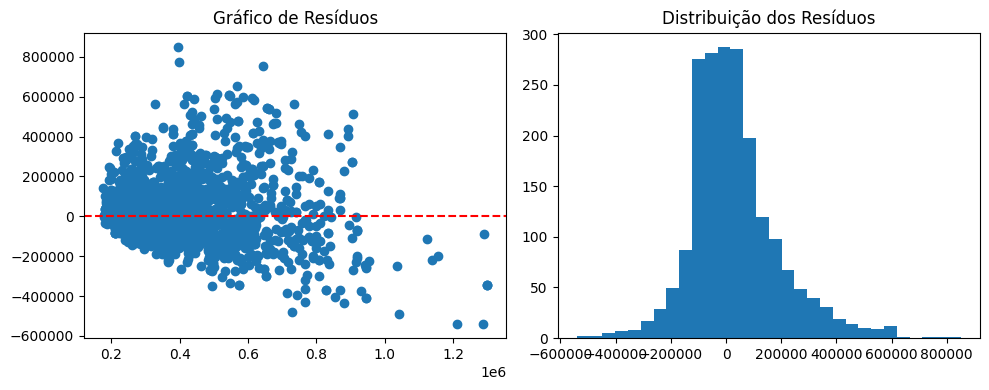


=== VERIFICAÇÃO DE RESÍDUOS ===
Média dos resíduos: R$29,288.34 (deve ser próxima de zero)
Assimetria: 0.86 (ideal entre -0.5 e 0.5)

Exemplo de predição para 70m²: R$462,488.56


In [ ]:
#ajuestes no modelo

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. PRÉ-PROCESSAMENTO ROBUSTO
# Remoção de registros inválidos e filtros adicionais
df_clean = df_filtrado[
    (df_filtrado['area(m2)'] > 25) &        # Remove áreas zeradas/negativas
    (df_filtrado['valor'] > 100000) &       # Remove preços irrealistas (ex.: < R$10k)
    (df_filtrado.notnull().all(axis=1))      # Remove valores nulos
].copy()

print(f"\n=== DADOS LIMPOS ===")
print(f"Registros válidos: {len(df_clean)}/{len(df_filtrado)}")
print(f"Faixa de valores: R${df_clean['valor'].min():,.2f} - R${df_clean['valor'].max():,.2f}")

# 2. SELEÇÃO E VERIFICAÇÃO DE VARIÁVEIS
variaveis = ['area(m2)', 'banheiro', 'garagem', 'quartos', 'suite']
X = df_clean[variaveis]

# Análise de multicolinearidade (VIF)
vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n=== VERIFICAÇÃO DE MULTICOLINEARIDADE ===")
print(vif_data.sort_values('VIF', ascending=False))

# 3. MODELAGEM COM LOG(PRECO) PARA NORMALIZAR (OPCIONAL)
# Ativar se os resíduos forem muito assimétricos
use_log = True  # Mude para False se quiser manter escala original

if use_log:
    y = np.log(df_clean['valor'])
    print("\n⚠️ Modelo usando log(valor) - coeficientes serão em escala logarítmica")
else:
    y = df_clean['valor']

# 4. DIVISÃO TREINO-TESTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. TREINAMENTO DO MODELO
model = LinearRegression()
model.fit(X_train, y_train)

# 6. AVALIAÇÃO
y_pred = model.predict(X_test)

print("\n=== MÉTRICAS ===")
if use_log:
    # Converter métricas para escala original
    y_test_exp = np.exp(y_test)
    y_pred_exp = np.exp(y_pred)
    print(f"R² (escala original): {r2_score(y_test_exp, y_pred_exp):.3f}")
    print(f"RMSE (R$): {mean_squared_error(y_test_exp, y_pred_exp, squared=False):,.2f}")
    
    # Cálculo do erro médio percentual (forma mais segura)
    erro_percentual = np.abs((y_test_exp - y_pred_exp) / y_test_exp).mean() * 100
    print(f"Erro Médio %: {erro_percentual:.1f}%")
else:
    print(f"R²: {r2_score(y_test, y_pred):.3f}")
    print(f"RMSE (R$): {mean_squared_error(y_test, y_pred, squared=False):,.2f}")
    
    # Cálculo do erro médio percentual (forma mais segura)
    erro_percentual = np.abs((y_test - y_pred) / y_test).mean() * 100
    print(f"Erro Médio %: {erro_percentual:.1f}%")

# 7. INTERPRETAÇÃO DOS COEFICIENTES
if use_log:
    # Efeitos multiplicativos em modelos log-lin
    coef_interpretacao = [f"{(np.exp(c)-1)*100:.1f}%" for c in model.coef_]
    coef_df = pd.DataFrame({
        'Variável': variaveis,
        'Coeficiente (%)': coef_interpretacao,
        'Impacto': [f"+ {i} no valor" if float(i[:-1]) > 0 else f"- {i.replace('-','')} no valor" for i in coef_interpretacao],
        'Exemplo Prático': [
            f"+ {(np.exp(model.coef_[0])-1)*100:.1f}% por m² adicional",
            f"+ {(np.exp(model.coef_[1])-1)*100:.1f}% por banheiro extra",
            f"+ {(np.exp(model.coef_[2])-1)*100:.1f}% por vaga de garagem",
            f"+ {(np.exp(model.coef_[3])-1)*100:.1f}% por quarto adicional",
            f"+ {(np.exp(model.coef_[4])-1)*100:.1f}% por suíte"
        ]
    })
else:
    coef_df = pd.DataFrame({
        'Variável': variaveis,
        'Coeficiente (R$)': model.coef_,
        'Impacto por Unidade': [f"+ R${c:,.2f}" if c > 0 else f"- R${abs(c):,.2f}" for c in model.coef_],
        'Exemplo Prático': [
            f"R${model.coef_[0]:,.2f} por m² adicional",
            f"R${model.coef_[1]:,.2f} por banheiro extra",
            f"R${model.coef_[2]:,.2f} por vaga de garagem",
            f"R${model.coef_[3]:,.2f} por quarto adicional",
            f"R${model.coef_[4]:,.2f} por suíte"
        ]
    })

print("\n=== IMPACTO DAS VARIÁVEIS ===")
print(coef_df.sort_values('Coeficiente (R$)' if not use_log else 'Coeficiente (%)', ascending=False))

if use_log:
    print(f"\nValor base (imóvel 0m²): R${np.exp(model.intercept_):,.2f} (intercepto exponenciado)")
else:
    print(f"\nValor base (imóvel 0m²): R${model.intercept_:,.2f}")

# 8. ANÁLISE DE RESÍDUOS
residuos = (y_test_exp - y_pred_exp) if use_log else (y_test - y_pred)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(y_pred_exp if use_log else y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos')

plt.subplot(1,2,2)
plt.hist(residuos, bins=30)
plt.title('Distribuição dos Resíduos')
plt.tight_layout()
plt.show()

print("\n=== VERIFICAÇÃO DE RESÍDUOS ===")
print(f"Média dos resíduos: R${residuos.mean():,.2f} (deve ser próxima de zero)")
print(f"Assimetria: {pd.Series(residuos).skew():.2f} (ideal entre -0.5 e 0.5)")

# 9. EXEMPLO DE PREDIÇÃO
exemplo = pd.DataFrame([[70, 2, 1, 2, 1]], columns=variaveis)
if use_log:
    pred = np.exp(model.predict(exemplo))[0]
else:
    pred = model.predict(exemplo)[0]
print(f"\nExemplo de predição para 70m²: R${pred:,.2f}")

=== INÍCIO DA MODELAGEM ===

=== DADOS LIMPOS ===
Registros válidos: 6682/6709
Faixa de valores: R$110,000.00 - R$1,420,000.00

=== ESTATÍSTICAS DAS VARIÁVEIS ===
          area(m2)     banheiro      garagem      quartos        suite
count  6682.000000  6682.000000  6682.000000  6682.000000  6682.000000
mean     64.603562     1.551931     1.125711     2.122418     0.297366
std      16.358206     0.650893     0.634110     0.576943     0.457133
min      26.000000     1.000000     0.000000     1.000000     0.000000
25%      51.000000     1.000000     1.000000     2.000000     0.000000
50%      63.000000     1.000000     1.000000     2.000000     0.000000
75%      76.000000     2.000000     1.000000     2.000000     1.000000
max     100.000000     7.000000    22.000000     4.000000     1.000000

=== VALORES ÚNICOS ===
area(m2): [np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(

C:\Users\vini\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


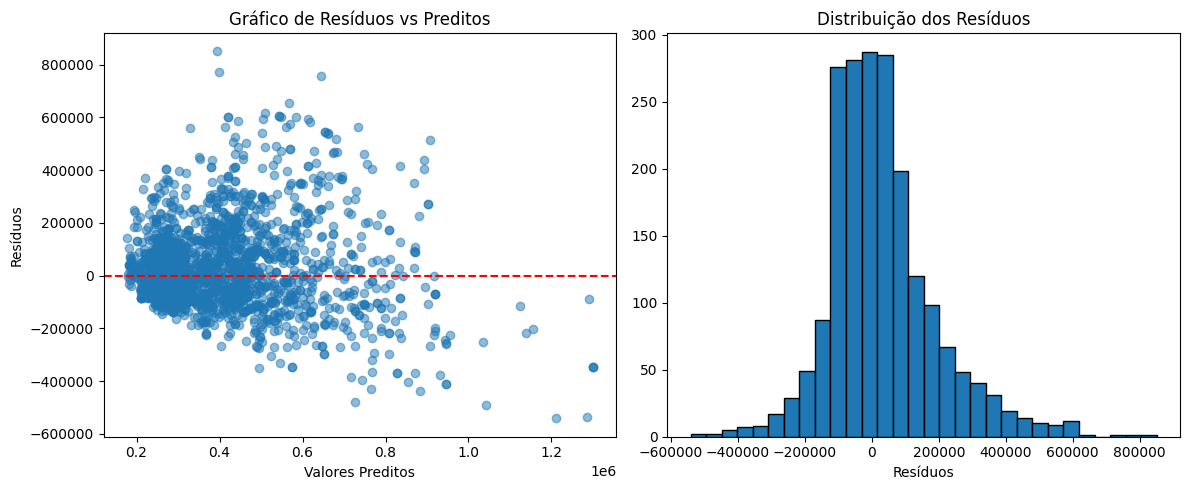


=== VERIFICAÇÃO DE RESÍDUOS ===
Média dos resíduos: R$29,288.34 (deve ser próxima de zero)
Assimetria: 0.86 (ideal entre -0.5 e 0.5)

=== EXEMPLOS DE PREDIÇÃO ===
Exemplo 1 (70m², 2 quartos, COM suíte): R$462,488.56
Exemplo 2 (70m², 2 quartos, SEM suíte): R$437,307.24

=== ANÁLISE DE CORRELAÇÃO ===
valor       1.000000
area(m2)    0.644305
banheiro    0.612146
garagem     0.410182
quartos     0.343801
suite       0.267211
Name: valor, dtype: float64

=== MODELAGEM FINALIZADA ===


In [ ]:
#ajustes no modelo II

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. PRÉ-PROCESSAMENTO ROBUSTO
print("=== INÍCIO DA MODELAGEM ===")

# Remoção de registros inválidos e filtros adicionais
df_clean = df_filtrado[
    (df_filtrado['area(m2)'] > 25) &        # Remove áreas zeradas/negativas
    (df_filtrado['valor'] > 100000) &       # Remove preços irrealistas
    (df_filtrado.notnull().all(axis=1))     # Remove valores nulos
].copy()

# Conversão explícita de variáveis booleanas
if 'suite' in df_clean.columns:
    df_clean['suite'] = df_clean['suite'].astype(int)  # Converte para 0/1

print("\n=== DADOS LIMPOS ===")
print(f"Registros válidos: {len(df_clean)}/{len(df_filtrado)}")
print(f"Faixa de valores: R${df_clean['valor'].min():,.2f} - R${df_clean['valor'].max():,.2f}")

# 2. SELEÇÃO E VERIFICAÇÃO DE VARIÁVEIS
variaveis = ['area(m2)', 'banheiro', 'garagem', 'quartos', 'suite']
X = df_clean[variaveis]

# Verificação dos dados
print("\n=== ESTATÍSTICAS DAS VARIÁVEIS ===")
print(X.describe())

print("\n=== VALORES ÚNICOS ===")
for var in variaveis:
    print(f"{var}: {sorted(df_clean[var].unique())}")

# Análise de multicolinearidade (VIF)
vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n=== VERIFICAÇÃO DE MULTICOLINEARIDADE ===")
print(vif_data.sort_values('VIF', ascending=False))

# 3. MODELAGEM COM LOG(PRECO) PARA NORMALIZAR
use_log = True  # Mude para False se quiser manter escala original

if use_log:
    y = np.log(df_clean['valor'])
    print("\n⚠️ Modelo usando log(valor) - coeficientes serão em escala logarítmica")
else:
    y = df_clean['valor']

# 4. DIVISÃO TREINO-TESTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. TREINAMENTO DO MODELO
model = LinearRegression()
model.fit(X_train, y_train)

# 6. AVALIAÇÃO
y_pred = model.predict(X_test)

print("\n=== MÉTRICAS ===")
if use_log:
    y_test_exp = np.exp(y_test)
    y_pred_exp = np.exp(y_pred)
    print(f"R² (escala original): {r2_score(y_test_exp, y_pred_exp):.3f}")
    print(f"RMSE (R$): {mean_squared_error(y_test_exp, y_pred_exp, squared=False):,.2f}")
    erro_percentual = np.abs((y_test_exp - y_pred_exp) / y_test_exp).mean() * 100
    print(f"Erro Médio %: {erro_percentual:.1f}%")
else:
    print(f"R²: {r2_score(y_test, y_pred):.3f}")
    print(f"RMSE (R$): {mean_squared_error(y_test, y_pred, squared=False):,.2f}")
    erro_percentual = np.abs((y_test - y_pred) / y_test).mean() * 100
    print(f"Erro Médio %: {erro_percentual:.1f}%")

# 7. INTERPRETAÇÃO DOS COEFICIENTES
if use_log:
    coef_interpretacao = [f"{(np.exp(c)-1)*100:.1f}%" for c in model.coef_]
    coef_df = pd.DataFrame({
        'Variável': variaveis,
        'Coeficiente (%)': coef_interpretacao,
        'Impacto': [f"+ {i}" if float(i[:-1]) > 0 else f"{i}" for i in coef_interpretacao],
        'Exemplo Prático': [
            f"{(np.exp(model.coef_[0])-1)*100:.1f}% por m² adicional",
            f"{(np.exp(model.coef_[1])-1)*100:.1f}% por banheiro extra",
            f"{(np.exp(model.coef_[2])-1)*100:.1f}% por vaga de garagem",
            f"{(np.exp(model.coef_[3])-1)*100:.1f}% por quarto adicional",
            f"{(np.exp(model.coef_[4])-1)*100:.1f}% para imóveis COM suíte"  # Explicação clara para booleana
        ]
    })
else:
    coef_df = pd.DataFrame({
        'Variável': variaveis,
        'Coeficiente (R$)': model.coef_,
        'Impacto': [f"+ R${c:,.2f}" if c > 0 else f"- R${abs(c):,.2f}" for c in model.coef_],
        'Exemplo Prático': [
            f"R${model.coef_[0]:,.2f} por m² adicional",
            f"R${model.coef_[1]:,.2f} por banheiro extra",
            f"R${model.coef_[2]:,.2f} por vaga de garagem",
            f"R${model.coef_[3]:,.2f} por quarto adicional",
            f"R${model.coef_[4]:,.2f} para imóveis COM suíte"  # Destaque para variável booleana
        ]
    })

print("\n=== IMPACTO DAS VARIÁVEIS ===")
print(coef_df.sort_values('Coeficiente (R$)' if not use_log else 'Coeficiente (%)', ascending=False))

if use_log:
    print(f"\nValor base (imóvel 0m²): R${np.exp(model.intercept_):,.2f} (intercepto exponenciado)")
else:
    print(f"\nValor base (imóvel 0m²): R${model.intercept_:,.2f}")

# 8. ANÁLISE DE RESÍDUOS
residuos = (y_test_exp - y_pred_exp) if use_log else (y_test - y_pred)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_pred_exp if use_log else y_pred, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos vs Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')

plt.subplot(1,2,2)
plt.hist(residuos, bins=30, edgecolor='black')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.tight_layout()
plt.show()

print("\n=== VERIFICAÇÃO DE RESÍDUOS ===")
print(f"Média dos resíduos: R${residuos.mean():,.2f} (deve ser próxima de zero)")
print(f"Assimetria: {pd.Series(residuos).skew():.2f} (ideal entre -0.5 e 0.5)")

# 9. EXEMPLO DE PREDIÇÃO
print("\n=== EXEMPLOS DE PREDIÇÃO ===")
exemplos = [
    [70, 2, 1, 2, 1],  # Apartamento com suíte
    [70, 2, 1, 2, 0]   # Apartamento sem suíte
]

for i, exemplo in enumerate(exemplos, 1):
    df_exemplo = pd.DataFrame([exemplo], columns=variaveis)
    if use_log:
        pred = np.exp(model.predict(df_exemplo))[0]
    else:
        pred = model.predict(df_exemplo)[0]
    
    tipo = "COM suíte" if exemplo[-1] == 1 else "SEM suíte"
    print(f"Exemplo {i} (70m², 2 quartos, {tipo}): R${pred:,.2f}")

print("\n=== ANÁLISE DE CORRELAÇÃO ===")
correlacao = df_clean[variaveis + ['valor']].corr()['valor'].sort_values(ascending=False)
print(correlacao)

print("\n=== MODELAGEM FINALIZADA ===")